In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 分類境界の描画(2次元)

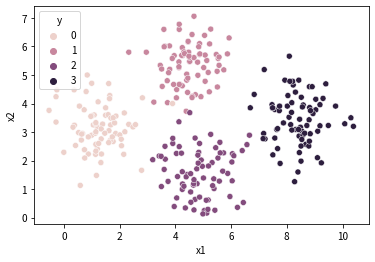

In [5]:
df = pd.read_csv("data7.csv",header=None)
df.columns = ["x1","x2","y"]

plt.figure(facecolor="white")
sns.scatterplot(x="x1",y="x2",hue="y",data=df)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

X = df[["x1","x2"]].to_numpy()
y = df["y"].to_numpy()

In [11]:
import matplotlib.cm as cm 

In [13]:
# 分類境界を描画する関数
def plot_class_boundary(model,X,y):
    if X.shape[1]!=2:
        print("X shape not match.")
    
    step_size = 0.01  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                 np.arange(y_min, y_max, step_size))
    output = model.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    output = output.reshape(x_values.shape) 
    marker_shapes = 'v^os'
    plt.figure(facecolor="white") 
    plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues) 

    for i in range(X.shape[0]): 
        plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                    s=50, edgecolors='black', facecolors='none') 

    plt.xlim(x_values.min(), x_values.max()) 
    plt.ylim(y_values.min(), y_values.max()) 
    plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-13-8ecc11b058d8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues)


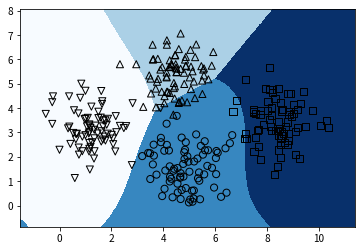

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

d = 3
C = 10

model = Pipeline([
    # 処理名とオブジェクトのタプルを記述する
    ("poly_features",PolynomialFeatures(degree=d)),
    ("svm_clf",LinearSVC(C=C,loss="hinge"))
])
model.fit(X,y)

plot_class_boundary(model,X,y)